In [3]:
%matplotlib inline
import csv
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import (RandomForestRegressor, IsolationForest)
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

TRAIN_FILE_PATH = "data/X_train.csv"
TARGET_FILE_PATH =  "data/y_train.csv"
TEST_FILE_PATH = "data/X_test.csv"

In [4]:
#Load train and test set

train_data = pd.read_csv(TRAIN_FILE_PATH)
train_data.drop(train_data.columns[0], axis=1, inplace=True)

Y_train = pd.read_csv(TARGET_FILE_PATH)
Y_train.drop(Y_train.columns[0], axis=1, inplace = True)

test_data =  pd.read_csv(TEST_FILE_PATH)
id_test = test_data.columns[0]
test_data.drop(test_data.columns[0], axis=1, inplace=True)

In [5]:
# fill missing values with mean column values train and test set
def fill_NaN(train, test):
    
    print("Train shape: ", train.shape)
    print("Test shape: ",test.shape)
    
    train_mean_values = train.mean()
    train =  train.fillna(train_mean_values)
    test = test.fillna(train_mean_values)
    
    return train,test


In [6]:
train_data_mean, test_data_mean = fill_NaN(train_data, test_data)

Train shape:  (1212, 887)
Test shape:  (776, 887)


In [7]:
def remove_outliers(X_train, Y_train):
    rng = np.random.RandomState(42)
    isoForest = IsolationForest(behaviour='new', max_samples=100, random_state=rng, contamination='auto')
    outliers = isoForest.fit_predict(X_train)
    print("Removed {} Outliers".format((outliers < 0).sum()))
    X_train["outliers"] = outliers
    X_train = X_train[X_train["outliers"] > 0]
    Y_train["outliers"] = outliers
    Y_train = Y_train[Y_train["outliers"] > 0]
    X_train.drop(["outliers"], axis=1, inplace = True)
    Y_train.drop(["outliers"], axis=1, inplace = True)
    return X_train, Y_train

In [8]:
train_data_mean_no_outlier, Y_train_no_outlier = remove_outliers(train_data_mean, Y_train)
Y_train.drop(["outliers"], axis=1, inplace = True)

Removed 3 Outliers


/home/ax/miniconda3/envs/aml/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [9]:
#Zero mean unit variance for train and test data
def scale_data(train, test):
    
    print("Train shape: ", train.shape)
    print("Test shape: ",test.shape)
    
    scaler = StandardScaler().fit(train, Y_train)
    train = scaler.transform(train)
    test = scaler.transform(test)
   
    return train, test

In [10]:
X_train_scaled, X_test_scaled = scale_data(train_data_mean_no_outlier, test_data_mean)

Train shape:  (1209, 887)
Test shape:  (776, 887)


[731 493 523 772 746  82 685 333 882 722 391 751 291   0  96 349 730 363
 687 673 340 185 604 664 838 309 180 686 665 300 297 744 608 156 345 853
  80 490 547 636 470 613 234 120 810 426 430 196 232 370 237 137 142  89
  42 736 332 634 201 111  85 505 554 871 460 229 224 520 560  83 372 205
 735 666 643  52 556 607 273   5 646 644  94 633 335 741 739 298 398 186
 637 266 787 840 251 615 716 618  88 484 326 388 158 833 638 632 605 794
 660 652 609 791 752 299 763 371 504   7 367  28 198 275 351 424 804 870
 697 277 879 450 374 795  32 611  66 599 369 781 457 823 151 844 269  20
 135 479 209 315 166 283]
150


/home/ax/miniconda3/envs/aml/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ax/miniconda3/envs/aml/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/home/ax/miniconda3/envs/aml/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/ax/miniconda3/envs/aml/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/ax/miniconda3/envs/aml/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  c

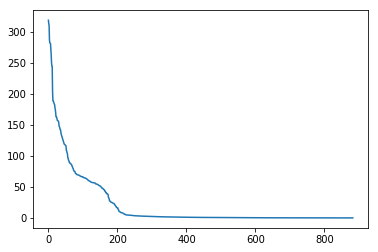

In [11]:
#Extract the features to use with f_regression

n_features_fr = 150

features_scores = f_regression(X_train_scaled, Y_train_no_outlier)[0]
#print(features_scores)
y = list(features_scores)
myarray = np.asarray(y)

plt.plot(-1*np.sort(-1*myarray));

indices_fr = myarray.argsort()[-n_features_fr:][::-1]
print(indices_fr)
print(len(indices_fr))



/home/ax/miniconda3/envs/aml/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[ 96 685 722  82 291 664 746 751 391 499 882  80 810 547 237 470   0 686
 651 687 229 838 730 273 309 140 560 224 173 349 591 529 297 300 604 823
   7 234 665 457 426 280 374 264 636 299 871 479 186  94 185 673 536 424
 803 608 400 853 333 556 450 196 744 739 340  83 370 644 449 720 605 870
 331 716 520 410  88 465 428 151 546 338 266 641 666 490  89 290 177 599
 361 829 137 460 618 430 799  18 504  85]


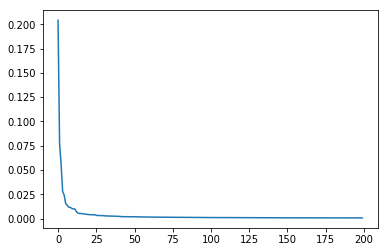

In [12]:
#Extract feature importance of Random Forest & find intersection/union with f_regression ones

n_features_rf = 100

rf = RandomForestRegressor(n_jobs=-1, n_estimators=50)
rf.fit(X_train_scaled,Y_train_no_outlier)

scores = list(rf.feature_importances_)
my_rf_features = np.asarray(scores)

plt.plot((-1*np.sort(-1*my_rf_features))[0:200]);

indices_rf = my_rf_features.argsort()[-n_features_rf:][::-1]

print(indices_rf)
#print(-1*np.sort(-1*rf.feature_importances_));


In [13]:
# Find intersection/union between best f_regression features and random forest's

#print(set(indices_rf).intersection(indices_fr))
#indices = set(indices_rf).intersection(indices_fr)

indices = list(np.union1d(indices_rf, indices_fr))
print(len(indices))

176


In [14]:
#Extract the feature selected from dataset

#indices = indices_rf
#indices = indices_fr

X_train_subset = train_data_mean[train_data_mean.columns[indices]]
X_test_subset = test_data_mean[train_data_mean.columns[indices]]


X_train_subset, X_test_subset = fill_NaN(X_train_subset, X_test_subset)
X_train_subset, X_test_subset = scale_data(X_train_subset, X_test_subset)

print(X_train_subset.shape)

Train shape:  (1212, 176)
Test shape:  (776, 176)
Train shape:  (1212, 176)
Test shape:  (776, 176)
(1212, 176)


In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers
from keras import initializers

def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

# fix random seed for reproducibility
# Parameters

input_dimensions = len(indices)
initializer = initializers.glorot_normal(seed=1)
lambda_reg = 2
Y = Y_train
num_epochs = 50
dropout = 0.1

# create model
model = Sequential()
model.add(Dense(80, input_dim= input_dimensions, kernel_regularizer = regularizers.l2(lambda_reg), init=initializer))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(80, kernel_regularizer = regularizers.l2(lambda_reg), init=initializer))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(80, kernel_regularizer = regularizers.l2(lambda_reg), init=initializer))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(80, kernel_regularizer = regularizers.l2(lambda_reg), init=initializer))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(80, kernel_regularizer = regularizers.l2(lambda_reg), init=initializer))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(80, kernel_regularizer = regularizers.l2(lambda_reg), init=initializer))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(80, kernel_regularizer = regularizers.l2(lambda_reg), init=initializer))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(80, kernel_regularizer = regularizers.l2(lambda_reg), init=initializer))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(80, kernel_regularizer = regularizers.l2(lambda_reg), init=initializer))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(80, kernel_regularizer = regularizers.l2(lambda_reg), init=initializer))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(80, kernel_regularizer = regularizers.l2(lambda_reg), init=initializer))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))

model.add(Dense(1, kernel_regularizer = regularizers.l1(lambda_reg), init='RandomUniform'))

# Compile model
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=[coeff_determination])

# Fit the model
seqModel = model.fit(x=X_train_subset, y=Y, epochs=num_epochs, verbose=2, validation_split=0.1, shuffle=True, 
          steps_per_epoch=100, initial_epoch=0, validation_steps=5)



/home/ax/miniconda3/envs/aml/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(80, input_dim=176, kernel_regularizer=<keras.reg..., kernel_initializer=<keras.ini...)`
/home/ax/miniconda3/envs/aml/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(80, kernel_regularizer=<keras.reg..., kernel_initializer=<keras.ini...)`
/home/ax/miniconda3/envs/aml/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(80, kernel_regularizer=<keras.reg..., kernel_initializer=<keras.ini...)`
/home/ax/miniconda3/envs/aml/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(80, kernel_regularizer=<keras.reg..., kernel_initializer=<keras.ini...)`
/home/ax/miniconda3/envs/aml/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: Updat

Train on 1090 samples, validate on 122 samples
Epoch 1/50
 - 2s - loss: 3305.8352 - coeff_determination: -2.4274e+01 - val_loss: 627.2991 - val_coeff_determination: -2.4700e-03
Epoch 2/50
 - 1s - loss: 612.4502 - coeff_determination: -9.0891e-01 - val_loss: 388.8423 - val_coeff_determination: 0.5176
Epoch 3/50
 - 1s - loss: 428.8993 - coeff_determination: -3.2478e-01 - val_loss: 300.5784 - val_coeff_determination: 0.5884
Epoch 4/50
 - 1s - loss: 344.1263 - coeff_determination: -8.7416e-02 - val_loss: 257.1245 - val_coeff_determination: 0.5544
Epoch 5/50
 - 1s - loss: 291.9315 - coeff_determination: 0.0472 - val_loss: 223.9028 - val_coeff_determination: 0.5602
Epoch 6/50
 - 1s - loss: 254.7950 - coeff_determination: 0.1326 - val_loss: 196.2329 - val_coeff_determination: 0.5858
Epoch 7/50
 - 1s - loss: 226.1187 - coeff_determination: 0.1976 - val_loss: 179.9486 - val_coeff_determination: 0.5517
Epoch 8/50
 - 1s - loss: 204.7540 - coeff_determination: 0.2353 - val_loss: 163.9184 - val_coe

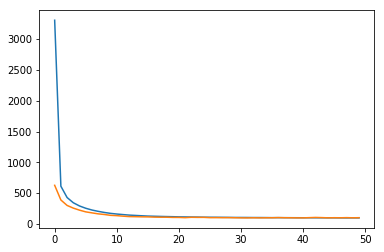

In [20]:
# visualizing losses and accuracy
train_loss = seqModel.history['loss']
val_loss   = seqModel.history['val_loss']
train_acc  = seqModel.history['coeff_determination']
xc         = range(num_epochs)


plt.plot(xc, train_loss);
plt.plot(xc, val_loss);

In [21]:
#Predict on test set

predictions = model.predict(X_test_subset)
print(predictions)

[[73.4471  ]
 [74.930756]
 [73.58153 ]
 [61.342075]
 [67.24899 ]
 [62.07364 ]
 [83.02821 ]
 [72.03891 ]
 [75.53009 ]
 [62.270218]
 [69.43298 ]
 [60.458115]
 [65.88168 ]
 [71.859085]
 [72.43245 ]
 [71.29303 ]
 [62.11716 ]
 [66.40166 ]
 [63.561996]
 [64.52837 ]
 [67.939926]
 [64.39435 ]
 [72.474625]
 [74.04016 ]
 [71.479706]
 [61.365223]
 [61.64443 ]
 [79.30792 ]
 [76.767   ]
 [70.946655]
 [54.198177]
 [70.693146]
 [62.196774]
 [61.774002]
 [65.524185]
 [70.23543 ]
 [80.40193 ]
 [58.1978  ]
 [73.28468 ]
 [75.61911 ]
 [74.34277 ]
 [69.9689  ]
 [67.814316]
 [61.70448 ]
 [65.348145]
 [64.37818 ]
 [74.24446 ]
 [73.98425 ]
 [73.60559 ]
 [71.95477 ]
 [55.806843]
 [58.935184]
 [65.86005 ]
 [61.305935]
 [62.25484 ]
 [68.628204]
 [81.42171 ]
 [66.71365 ]
 [56.66432 ]
 [69.79256 ]
 [79.76323 ]
 [76.60649 ]
 [76.26233 ]
 [68.531006]
 [68.59738 ]
 [68.99565 ]
 [73.875885]
 [81.06334 ]
 [60.39535 ]
 [58.716038]
 [65.241486]
 [62.06844 ]
 [85.43701 ]
 [71.53691 ]
 [54.434917]
 [63.53299 ]
 [68.28479 ]

In [22]:
#Prepare predictions to be wirtten to csv
filename = "ax_keras_gpu_2.csv"
test_data =  pd.read_csv(TEST_FILE_PATH)
test_data["y"] = predictions
test_data[["id", "y"]].to_csv("submissions/"+filename, index= False)

#print(y_pred)

In [26]:
pred_1 =  pd.read_csv("submissions/ax_keras_gpu.csv")
pred_2 =  pd.read_csv("submissions/ax_keras_gpu_2.csv")

diff = pred_1["y"] - pred_2["y"]
print(diff)
print(np.sum(diff * diff))

0      1.536830
1     -0.739406
2     -1.759440
3     -2.000209
4     -1.418500
5     -2.624387
6     -1.431070
7      1.299660
8     -0.990560
9      1.366856
10     0.128536
11    -0.165039
12    -2.380982
13     0.130255
14     3.739074
15    -1.719246
16    -0.227863
17    -0.575670
18     1.685284
19    -0.777610
20    -1.151016
21     0.900340
22     1.589735
23     0.670915
24    -3.508556
25     1.130070
26    -0.967794
27     0.964570
28     1.425220
29    -0.566125
         ...   
746   -0.122314
747    0.144950
748    1.638270
749    0.499110
750   -1.245660
751    0.346564
752   -1.388246
753    0.650790
754   -0.524700
755   -0.354750
756    1.920910
757   -0.719775
758   -2.308030
759    1.349920
760    1.034250
761    0.864604
762    1.014366
763   -1.411526
764   -0.870430
765   -0.480270
766    0.496580
767    3.161454
768    0.291290
769   -1.466641
770    0.471240
771   -1.741368
772   -1.287226
773    1.798260
774   -0.184550
775    3.989800
Name: y, Length: 776, dt